In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
mainimg =r"C:\Users\user\Desktop\CV assign\Starmap.png"
croppedimg = r"C:\Users\user\Desktop\CV assign\small_area.png"
rotcropped = r"C:\Users\user\Desktop\CV assign\rotated_area.png"


In [ ]:
#Note: I think SIFT algorithm will work well on this problem because of the invariant features such as resolution or rotation.

In [30]:
def match(cropped,bigimage):

    MIN_MATCH_COUNT = 4


    img1 = cv2.imread(cropped,0)  # croppedImage
    img2 = cv2.imread(bigimage,0) #Star Map

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create(0,3,0)
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    #find matches using FLANN
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    #apply ratio test to find best matches (values from 0.7-1 made sense here)
    good = []
    for m,n in matches:
        if m.distance < 1*n.distance:
            good.append(m)

    #find homography to transform the edges of the query image and draw them on the train image
    #This is also used to mask all keypoints that aren't inside this box further below.
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #draw the good matched key points
    plt.figure(figsize=(7,5), dpi=200)
    plt.imshow(img2,cmap='gray')
    plt.figure(figsize=(1,1), dpi=200)
    plt.imshow(img1,cmap="gray")
    return(print("Our points are \n {}".format(dst)))

Our points are 
 [[[855.0256  150.02109]]

 [[855.00183 262.9805 ]]

 [[967.9784  263.00928]]

 [[968.01416 149.97401]]]


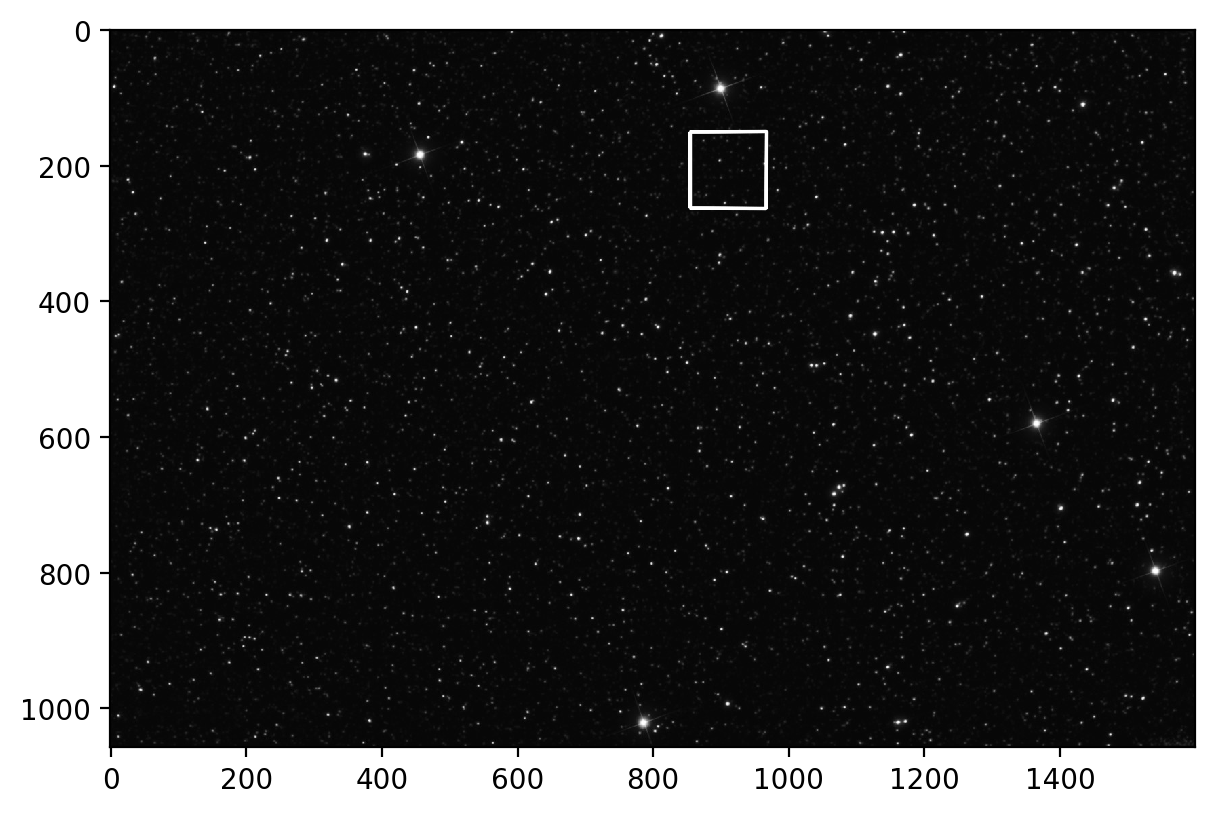

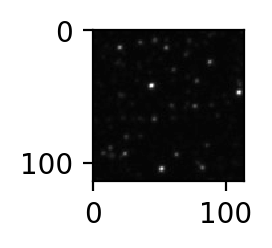

In [31]:
match(croppedimg,mainimg)    

Our points are 
 [[[420.67575 639.66644]]

 [[498.94415 771.0166 ]]

 [[630.616   693.0134 ]]

 [[552.4661  561.25696]]]


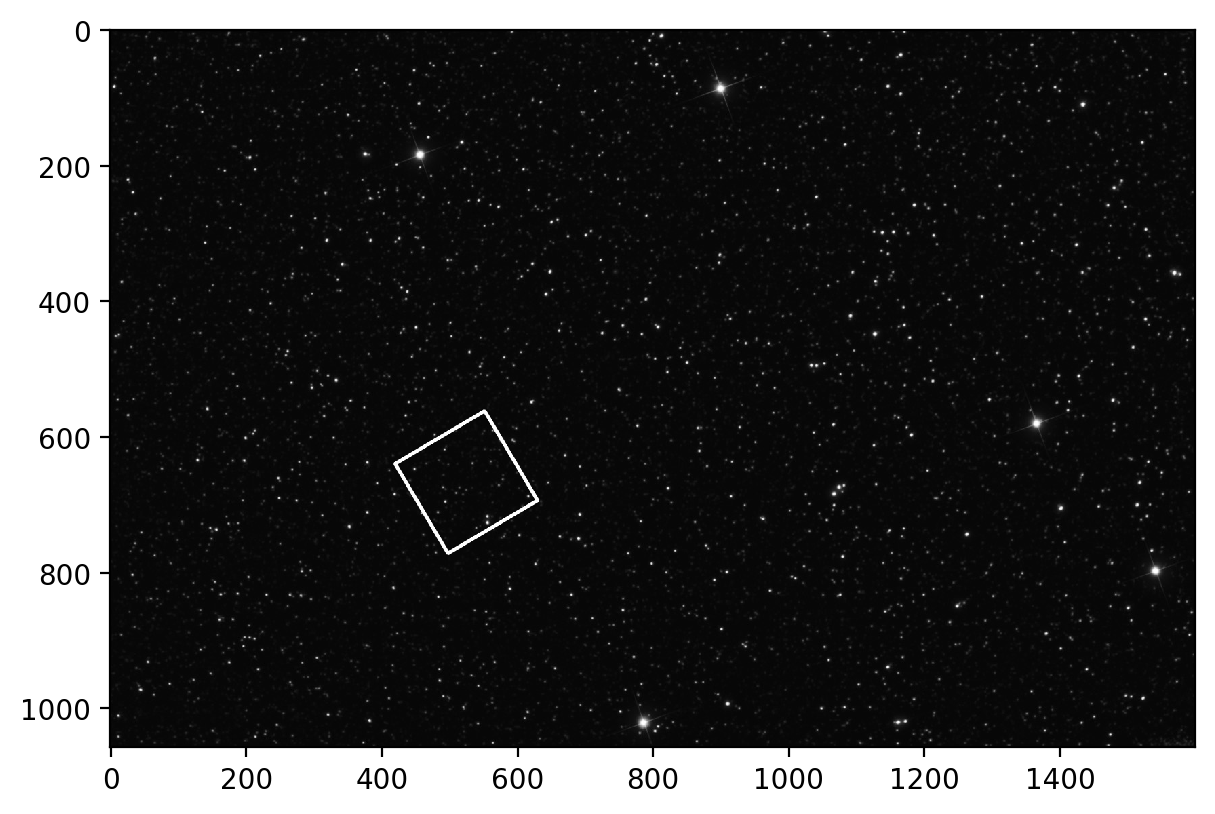

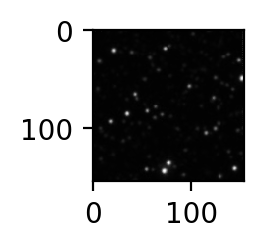

In [32]:
match(rotcropped,mainimg)    